<a href="https://colab.research.google.com/github/WaithiraHawi/Sentiment_Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/Sentiment_Analysis.csv'
df = pd.read_csv(file_path)

basic_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "dtypes": df.dtypes.to_dict(),
    "missing_values": df.isnull().sum().to_dict(),
    "duplicate_rows": df.duplicated().sum()
}

basic_info

{'shape': (40000, 4),
 'columns': ['tweet_id', 'sentiment', 'author', 'content'],
 'dtypes': {'tweet_id': dtype('int64'),
  'sentiment': dtype('O'),
  'author': dtype('O'),
  'content': dtype('O')},
 'missing_values': {'tweet_id': 0, 'sentiment': 0, 'author': 0, 'content': 0},
 'duplicate_rows': np.int64(0)}

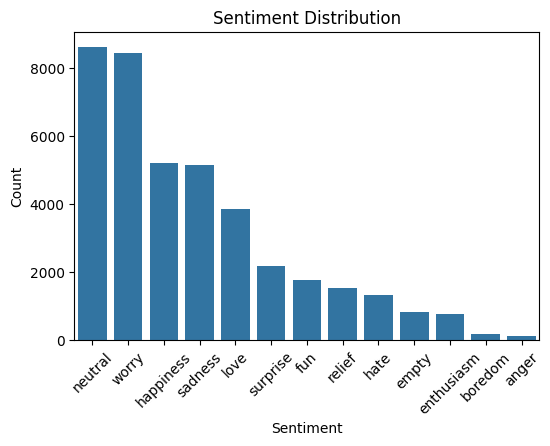

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Set style
plt.style.use('default')

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1674669523.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")


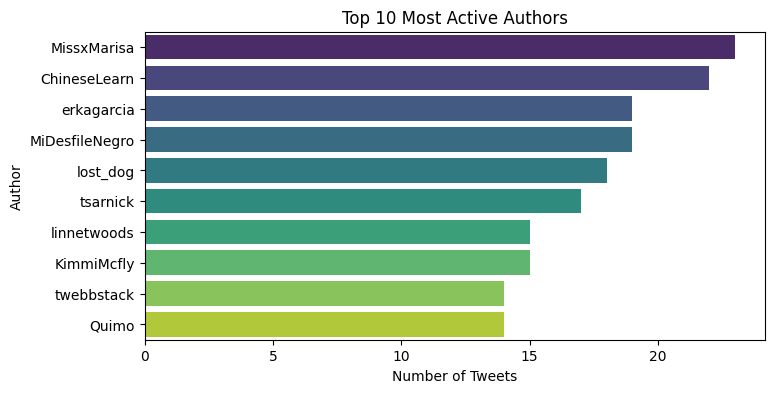

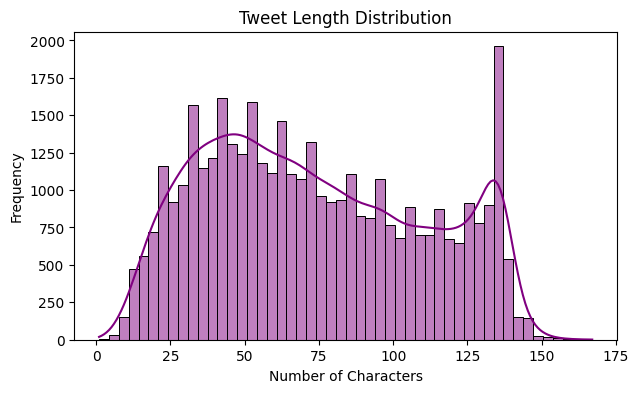

In [5]:
# Top Authors and Tweet Activity
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Most Active Authors")
plt.xlabel("Number of Tweets")
plt.ylabel("Author")
plt.show()

# Text Analysis
# Add text length column
df['text_length'] = df['content'].astype(str).apply(len)

# Text length distribution
plt.figure(figsize=(7,4))
sns.histplot(df['text_length'], bins=50, kde=True, color='purple')
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3191313768.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='mako')


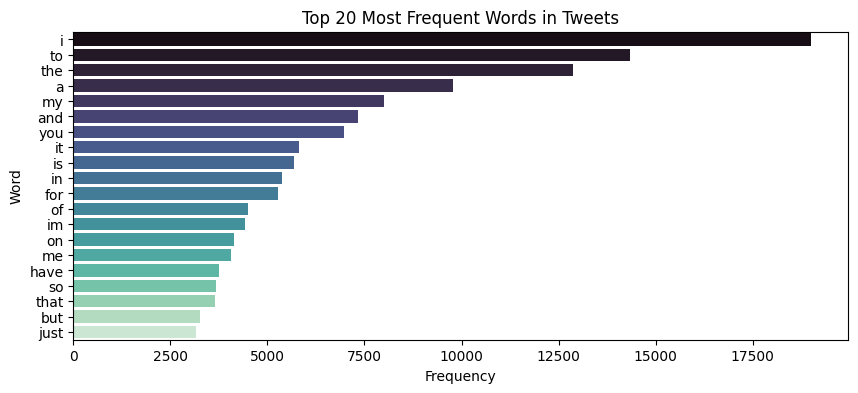

In [6]:
# Most frequent words
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text

all_words = ' '.join(df['content'].astype(str).apply(clean_text))
word_freq = Counter(all_words.split())
most_common_words = word_freq.most_common(20)

# Plotting the most frequent words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10,4))
sns.barplot(x=list(counts), y=list(words), palette='mako')
plt.title("Top 20 Most Frequent Words in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

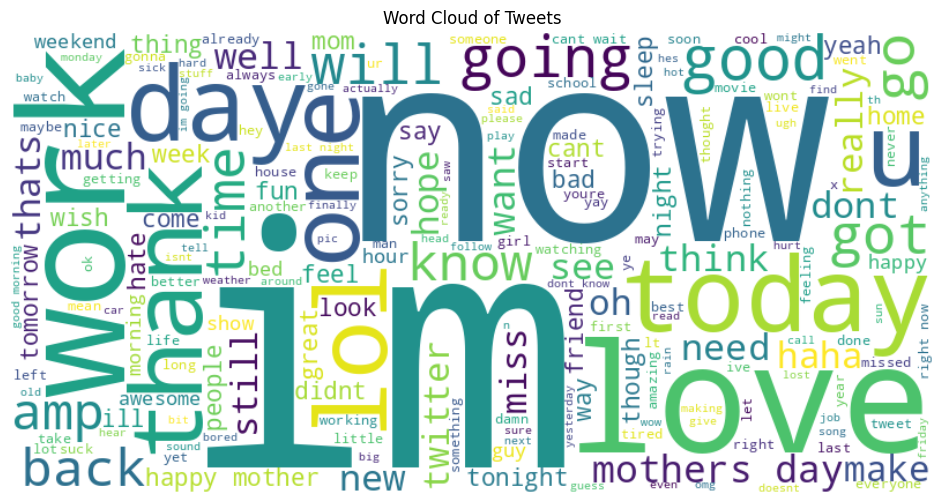

In [7]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.show()

In [11]:
# Advanced Insights
# Generating bigrams (2-word phrases)
def get_ngrams(text, n=2):
    words = text.split()
    return zip(*[words[i:] for i in range(n)])

bigram_counter = Counter()
for text in df['content'].astype(str).apply(clean_text):
    bigram_counter.update([' '.join(gram) for gram in get_ngrams(text, 2)])

top_bigrams = bigram_counter.most_common(20)

/tmp/ipython-input-3814919810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigram_counts), y=list(bigrams), palette='coolwarm')


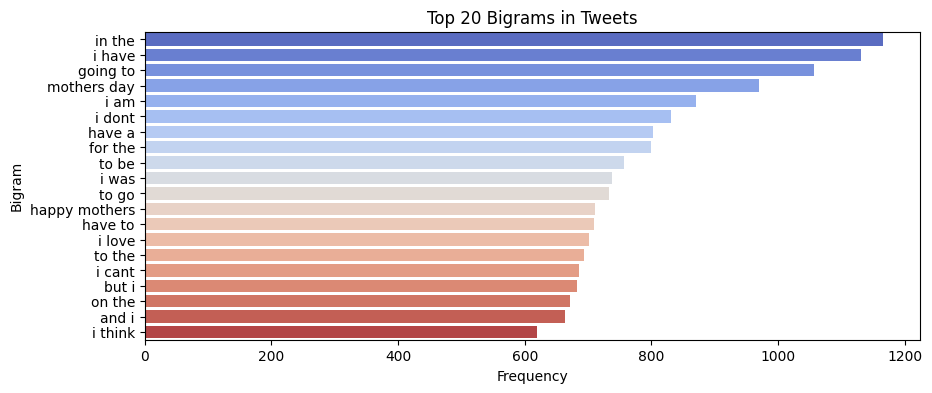

In [9]:
# Plotting top bigrams
bigrams, bigram_counts = zip(*top_bigrams)
plt.figure(figsize=(10,4))
sns.barplot(x=list(bigram_counts), y=list(bigrams), palette='coolwarm')
plt.title("Top 20 Bigrams in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

<Figure size 1000x600 with 0 Axes>

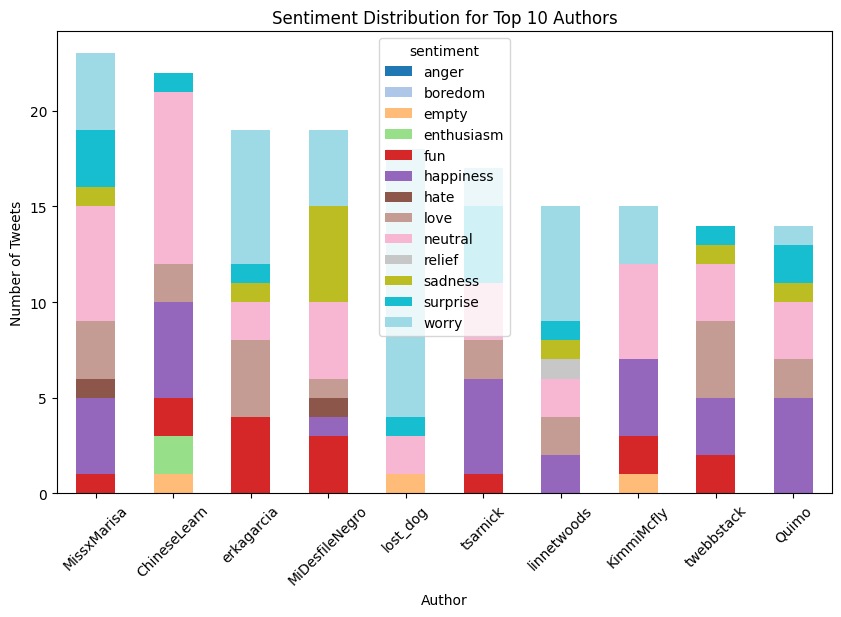

[('in the', 1165),
 ('i have', 1131),
 ('going to', 1056),
 ('mothers day', 970),
 ('i am', 870),
 ('i dont', 831),
 ('have a', 802),
 ('for the', 800),
 ('to be', 756),
 ('i was', 738)]

In [10]:
# Sentiment by author
sentiment_by_author = df.groupby('author')['sentiment'].value_counts().unstack(fill_value=0)
top_author_sentiments = sentiment_by_author.loc[top_authors.index]

plt.figure(figsize=(10,6))
top_author_sentiments.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10,6))
plt.title("Sentiment Distribution for Top 10 Authors")
plt.xlabel("Author")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()

top_bigrams[:10]  # Displaying top 10 bigrams